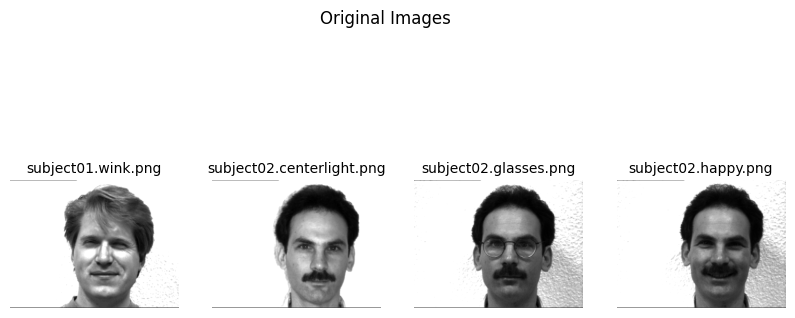

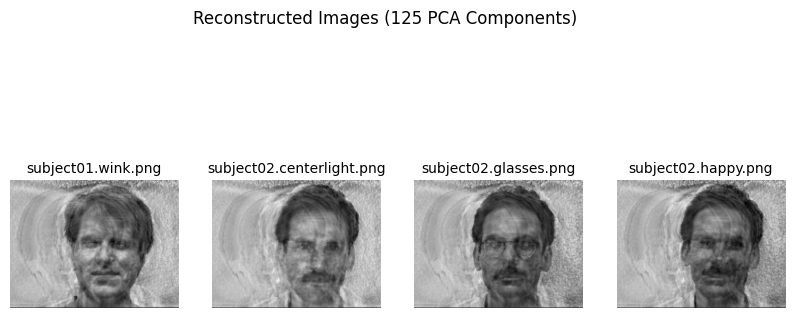

In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from PIL import Image

yalefaces_path = 'data/yalefaces_data/'

def load_images_and_labels(path):
    images, filenames, labels = [], [], []
    for file in os.listdir(path):
        if file.endswith('.png'):
            img = Image.open(os.path.join(path, file))
            img = img.convert('L')
            img = np.array(img)
            images.append(img.flatten())
            filenames.append(file)
            label = int(file.split('subject')[1].split('.')[0])  # Extract subject number
            labels.append(label)
    return np.array(images), filenames, np.array(labels)

images, filenames, labels = load_images_and_labels(yalefaces_path)
selected_images = images[10:14]
selected_filenames = filenames[10:14]

fig, axs = plt.subplots(1, 4, figsize=(10, 5))
fig.subplots_adjust(top=0.85)
for i, img in enumerate(selected_images):
    axs[i].imshow(img.reshape(243, 320), cmap='gray')
    axs[i].set_title(selected_filenames[i], fontsize=10)
    axs[i].axis('off')
plt.suptitle("Original Images", y=0.95)
plt.show()

pca = PCA(n_components=125)
scaler = MinMaxScaler()
images = scaler.fit_transform(images)
pca.fit(images)
images_pca = pca.transform(selected_images)

reconstructed_images = pca.inverse_transform(images_pca)

fig, axs = plt.subplots(1, 4, figsize=(10, 5))
fig.subplots_adjust(top=0.85)
for i, img in enumerate(reconstructed_images):
    axs[i].imshow(img.reshape(243, 320), cmap='gray')
    axs[i].set_title(selected_filenames[i], fontsize=10)
    axs[i].axis('off')
plt.suptitle("Reconstructed Images (125 PCA Components)", y=0.95)
plt.show()

Naive Bayes - Accuracy: 0.660, Precision: 0.770, Recall: 0.660, Fitting Time: 0.000s


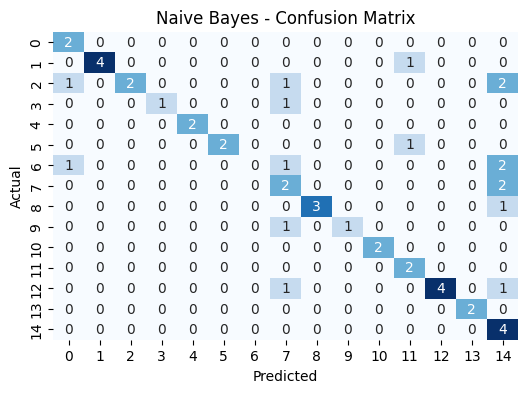

Logistic Regression - Accuracy: 0.960, Precision: 0.964, Recall: 0.960, Fitting Time: 0.020s


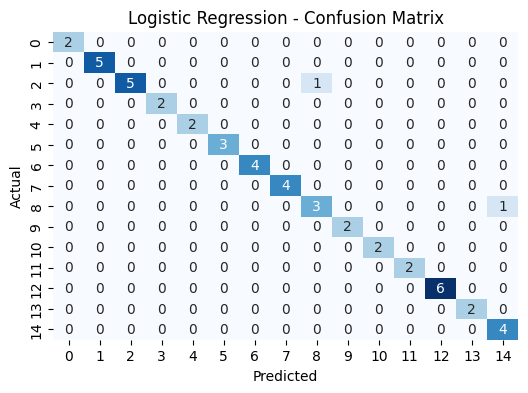

MLP - Accuracy: 0.600, Precision: 0.616, Recall: 0.600, Fitting Time: 0.047s


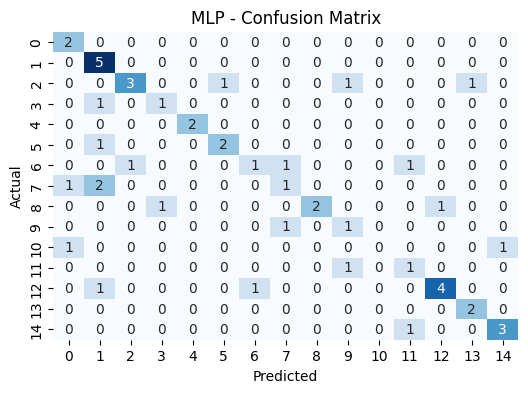

In [36]:
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

pca = PCA(n_components=125)
images_reduced = pca.fit_transform(images)

X_train, X_test, y_train, y_test = train_test_split(images_reduced, labels, test_size=0.3, random_state=42)

models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'MLP': MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, learning_rate_init=0.001, learning_rate='constant')
}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    fitting_time = time.time() - start_time
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    
    print(f"{name} - Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, Fitting Time: {fitting_time:.3f}s")
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [45]:
import random

random_indices = random.sample(range(len(X_test)), 5)
X_random = X_test[random_indices]
y_random_true = y_test[random_indices]

print("Predictions for 5 random test faces:\n")
for name, model in models.items():
    y_random_pred = model.predict(X_random)
    print(f"Model: {name}")
    for i, idx in enumerate(random_indices):
        print(f"Face {idx} - Predicted: {y_random_pred[i]}, Actual: {y_random_true[i]}")
    print("\n")

Predictions for 5 random test faces:

Model: Naive Bayes
Face 43 - Predicted: 9, Actual: 9
Face 5 - Predicted: 15, Actual: 3
Face 23 - Predicted: 1, Actual: 1
Face 27 - Predicted: 6, Actual: 6
Face 2 - Predicted: 12, Actual: 12


Model: Logistic Regression
Face 43 - Predicted: 9, Actual: 9
Face 5 - Predicted: 3, Actual: 3
Face 23 - Predicted: 1, Actual: 1
Face 27 - Predicted: 6, Actual: 6
Face 2 - Predicted: 12, Actual: 12


Model: MLP
Face 43 - Predicted: 9, Actual: 9
Face 5 - Predicted: 14, Actual: 3
Face 23 - Predicted: 1, Actual: 1
Face 27 - Predicted: 2, Actual: 6
Face 2 - Predicted: 10, Actual: 12


